<a href="https://colab.research.google.com/github/Akshaya021098/Text-Classification-Final-Code-/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras import backend as K
from joblib import dump, load
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/english_dataset.csv')
data

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE
...,...,...,...,...,...
5847,hasoc_en_5848,"@davidfrum @trueblueusa1 That's cute and all, ...",HOF,PRFN,UNT
5848,hasoc_en_5849,a recession issa comin' #maga #magamyass #fuck...,NOT,NONE,NONE
5849,hasoc_en_5850,#DoctorsFightBack Will 'The Mad n Irrational ...,HOF,OFFN,TIN
5850,hasoc_en_5851,#ShiningIndia #educatedindia or more like RUND...,HOF,OFFN,UNT


In [ ]:
data.shape

(5852, 5)

In [ ]:
data.isnull()

,text_id,text,task_1,task_2,task_3
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5847,False,False,False,False,False
5848,False,False,False,False,False
5849,False,False,False,False,False
5850,False,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text_id  5852 non-null   object
 1   text     5852 non-null   object
 2   task_1   5852 non-null   object
 3   task_2   5852 non-null   object
 4   task_3   5852 non-null   object
dtypes: object(5)
memory usage: 228.7+ KB


In [ ]:
data.isna().sum()

text_id    0
text       0
task_1     0
task_2     0
task_3     0
dtype: int64

In [ ]:
label_mapping = {
    'HOF': 1,
    'OFFN': 2,
    'HATE': 3,
    'PRFN':4,
    'TIN': 5,
    'UNT': 6,
    'NONE': 7,
    'NOT': 8
}

In [ ]:
data.replace({'task_1': label_mapping, 'task_2': label_mapping, 'task_3': label_mapping}, inplace=True)

In [ ]:
print(data)

            text_id                                               text  \
0        hasoc_en_1  #DhoniKeepsTheGlove | WATCH: Sports Minister K...   
1        hasoc_en_2  @politico No. We should remember very clearly ...   
2        hasoc_en_3  @cricketworldcup Guess who would be the winner...   
3        hasoc_en_4  Corbyn is too politically intellectual for #Bo...   
4        hasoc_en_5  All the best to #TeamIndia for another swimmin...   
...             ...                                                ...   
5847  hasoc_en_5848  @davidfrum @trueblueusa1 That's cute and all, ...   
5848  hasoc_en_5849  a recession issa comin' #maga #magamyass #fuck...   
5849  hasoc_en_5850  #DoctorsFightBack  Will 'The Mad n Irrational ...   
5850  hasoc_en_5851  #ShiningIndia #educatedindia or more like RUND...   
5851  hasoc_en_5852  Could this be our new Prime Minister?     #Ric...   

      task_1  task_2  task_3  
0          8       7       7  
1          1       3       5  
2          8      

In [ ]:
majority_class = data[['task_1', 'task_2', 'task_3']].mode(axis=1, numeric_only=True).astype(float)
majority_class.fillna(0, inplace=True)  # Fill NaN with 0
data['majority_class_1'] = majority_class.iloc[:, 0].astype(int)
data['majority_class_2'] = majority_class.iloc[:, 1].astype(int)
data['majority_class_3'] = majority_class.iloc[:, 2].astype(int)
data['label'] = majority_class.apply(lambda row: row.max(), axis=1).astype(int)
print(data)

            text_id                                               text  \
0        hasoc_en_1  #DhoniKeepsTheGlove | WATCH: Sports Minister K...   
1        hasoc_en_2  @politico No. We should remember very clearly ...   
2        hasoc_en_3  @cricketworldcup Guess who would be the winner...   
3        hasoc_en_4  Corbyn is too politically intellectual for #Bo...   
4        hasoc_en_5  All the best to #TeamIndia for another swimmin...   
...             ...                                                ...   
5847  hasoc_en_5848  @davidfrum @trueblueusa1 That's cute and all, ...   
5848  hasoc_en_5849  a recession issa comin' #maga #magamyass #fuck...   
5849  hasoc_en_5850  #DoctorsFightBack  Will 'The Mad n Irrational ...   
5850  hasoc_en_5851  #ShiningIndia #educatedindia or more like RUND...   
5851  hasoc_en_5852  Could this be our new Prime Minister?     #Ric...   

      task_1  task_2  task_3  majority_class_1  majority_class_2  \
0          8       7       7               

In [ ]:
remove_coloumns= ['text_id','task_1','task_2', 'task_3','majority_class_1','majority_class_2','majority_class_3']
df = data.drop(remove_coloumns, axis=1)

In [ ]:
print(df)

                                                   text  label
0     #DhoniKeepsTheGlove | WATCH: Sports Minister K...      7
1     @politico No. We should remember very clearly ...      5
2     @cricketworldcup Guess who would be the winner...      7
3     Corbyn is too politically intellectual for #Bo...      7
4     All the best to #TeamIndia for another swimmin...      7
...                                                 ...    ...
5847  @davidfrum @trueblueusa1 That's cute and all, ...      6
5848  a recession issa comin' #maga #magamyass #fuck...      7
5849  #DoctorsFightBack  Will 'The Mad n Irrational ...      5
5850  #ShiningIndia #educatedindia or more like RUND...      6
5851  Could this be our new Prime Minister?     #Ric...      6

[5852 rows x 2 columns]


In [ ]:
text = df['text'].tolist()
label= df['label'].tolist()

In [ ]:
df['text'] = df['text'].astype('string')

In [ ]:
df = pd.DataFrame({'tweet': text, 'label': label})

In [ ]:
tweet = list(df['tweet'])
labels = list(df['label'])

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
# rt to remove retweet in dataset (noise)
stop_words.add("rt")
# remove html entity:
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text
# change the user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)

    return text

# remove urls
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# remove unnecessary symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')

    return text

# remove stopwords
def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)
    return text

## this function in to clean all the dataset by utilizing all the function above
def preprocess(datas):
    clean = []
    # change the @xxx into "user"
    clean = [change_user(text) for text in datas]
    # remove emojis (specifically unicode emojis)
    clean = [remove_entity(text) for text in clean]
    # remove urls
    clean = [remove_url(text) for text in clean]
    # remove trailing stuff
    clean = [remove_noise_symbols(text) for text in clean]
    # remove stopwords
    clean = [remove_stopwords(text) for text in clean]

    return clean

In [ ]:
nltk.download('punkt')
clean_tweet = preprocess(tweet)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Exploratory Data Analysis

<ipython-input-79-24828ae69462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


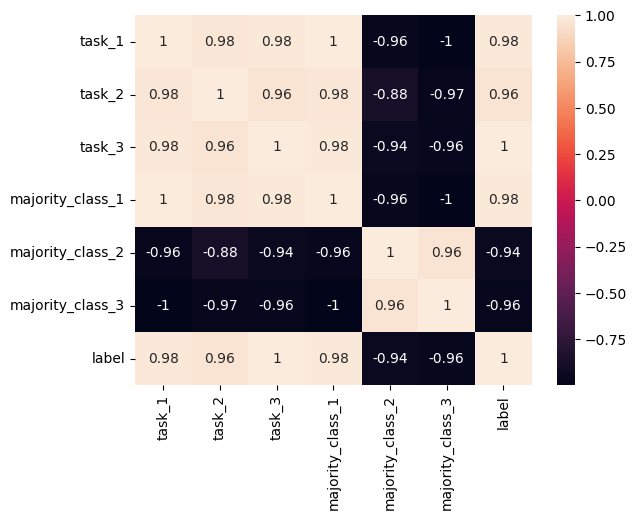

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

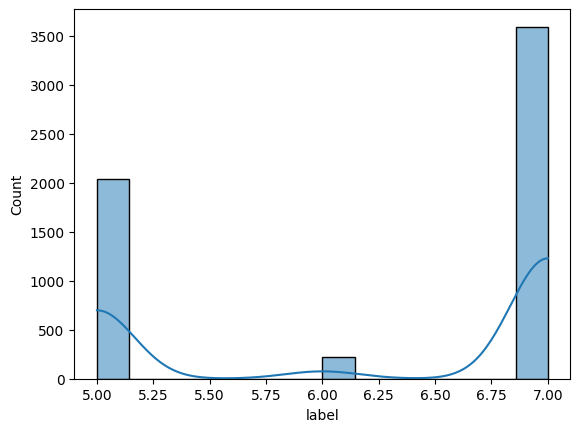

In [ ]:
sns.histplot(data['label'], kde=True)
plt.show()

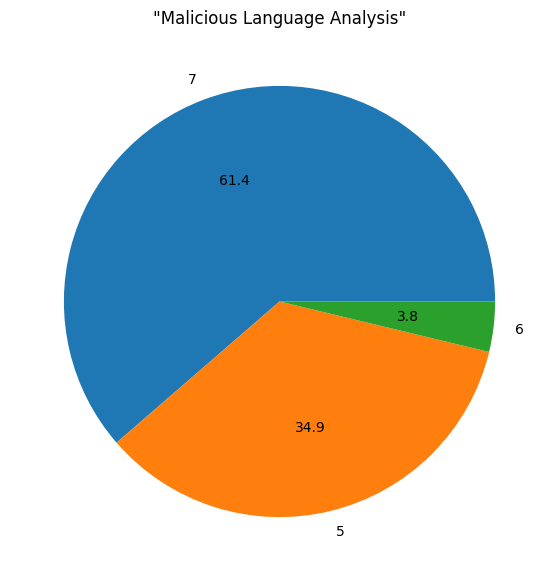

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = data['label'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('"Malicious Language Analysis"')
plt.show()

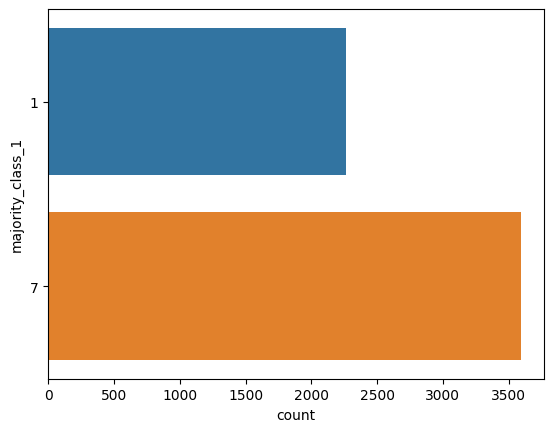

In [ ]:
sns.countplot(y='majority_class_1', data=data)
plt.figsize=(20,15)
plt.show()

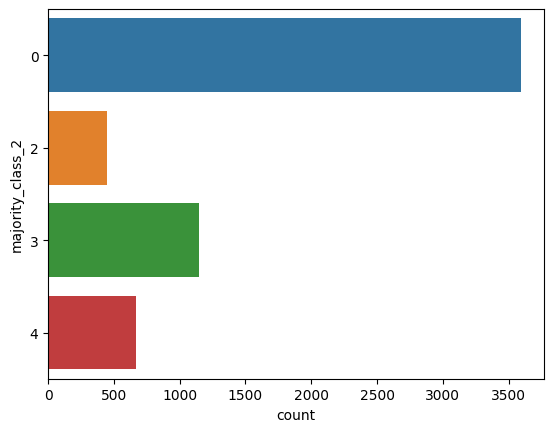

In [ ]:
sns.countplot(y='majority_class_2', data=data)
plt.show()

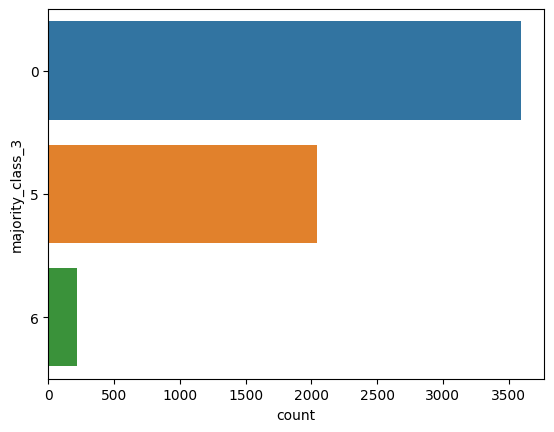

In [ ]:
sns.countplot(y='majority_class_3', data=data)
plt.show()

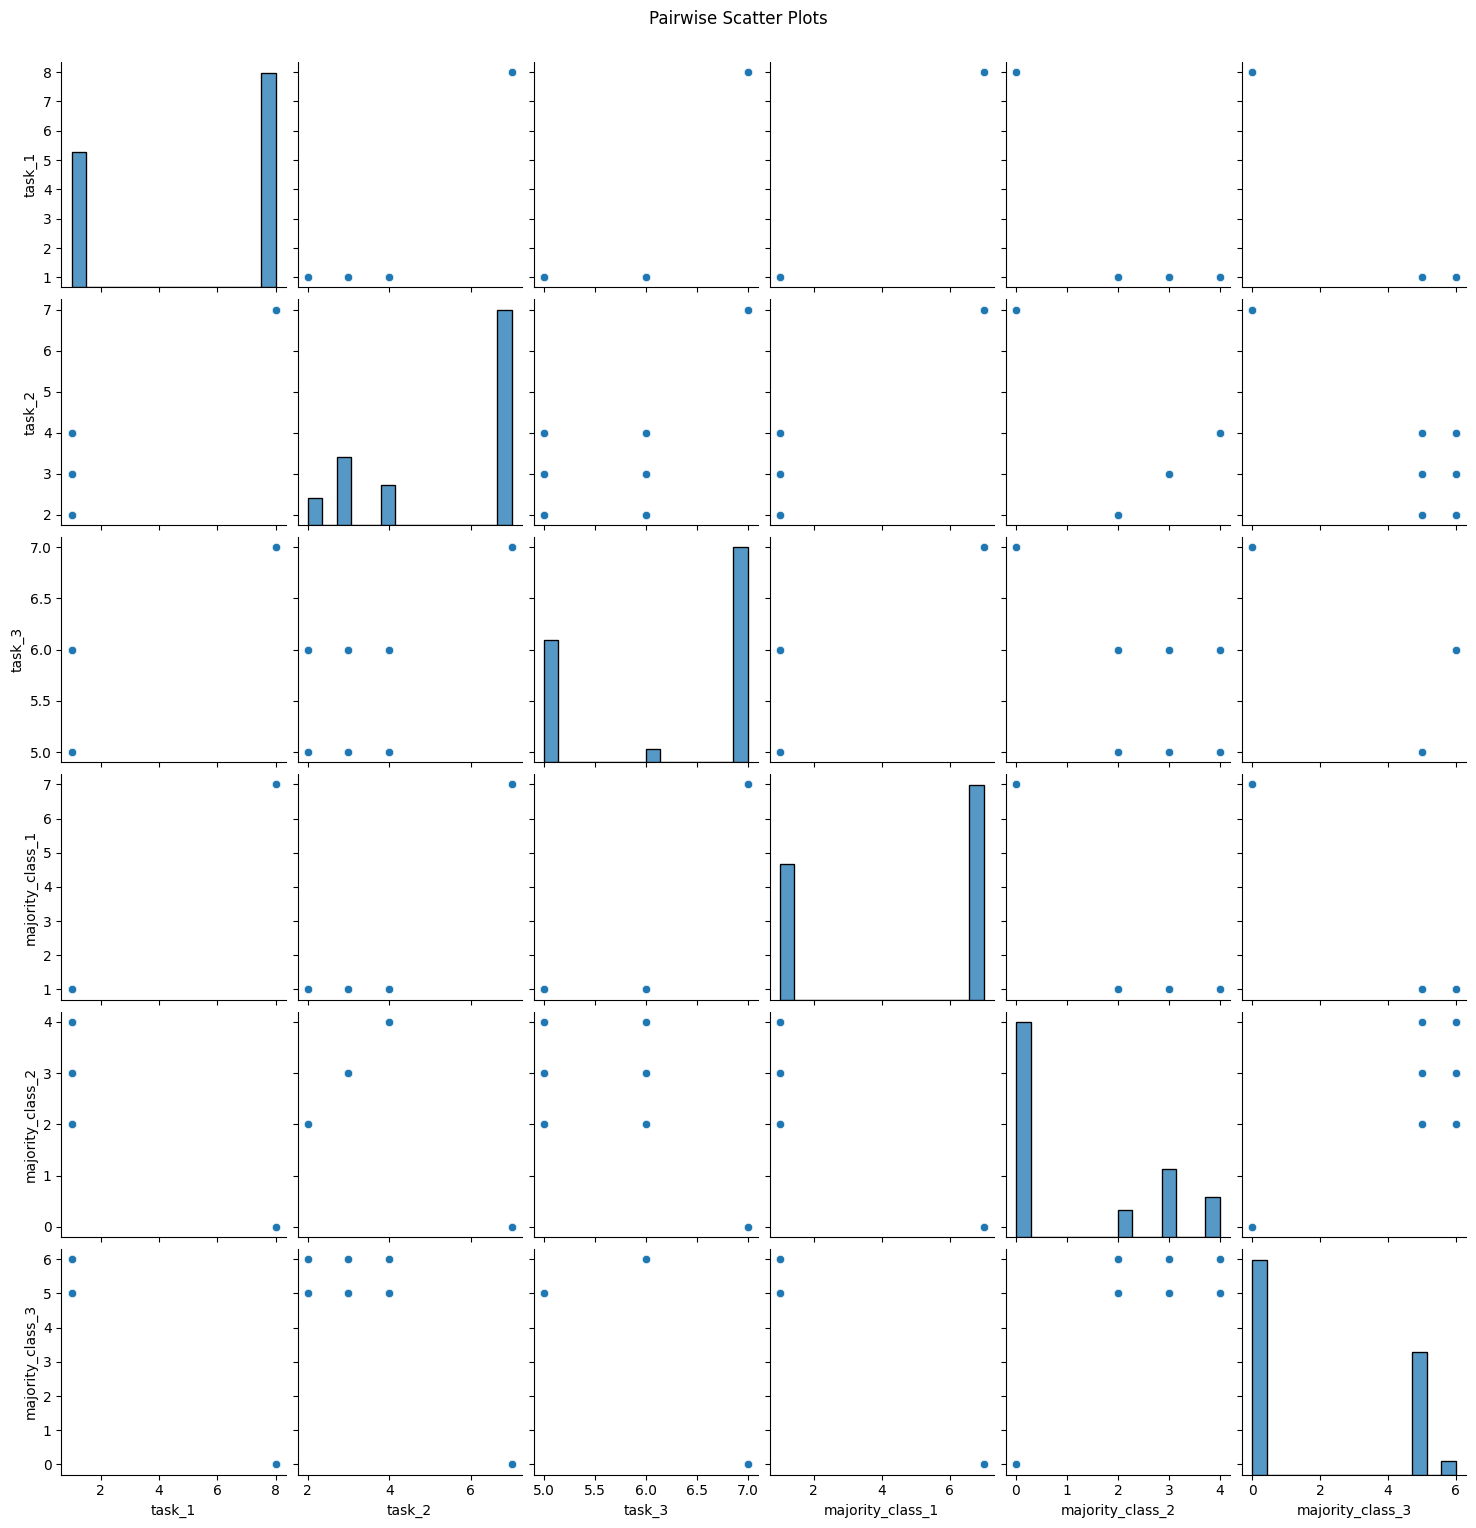

In [ ]:
label=['task_1', 'task_2', 'task_3', 'majority_class_1', 'majority_class_2', 'majority_class_3']
sns.pairplot(data[label])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

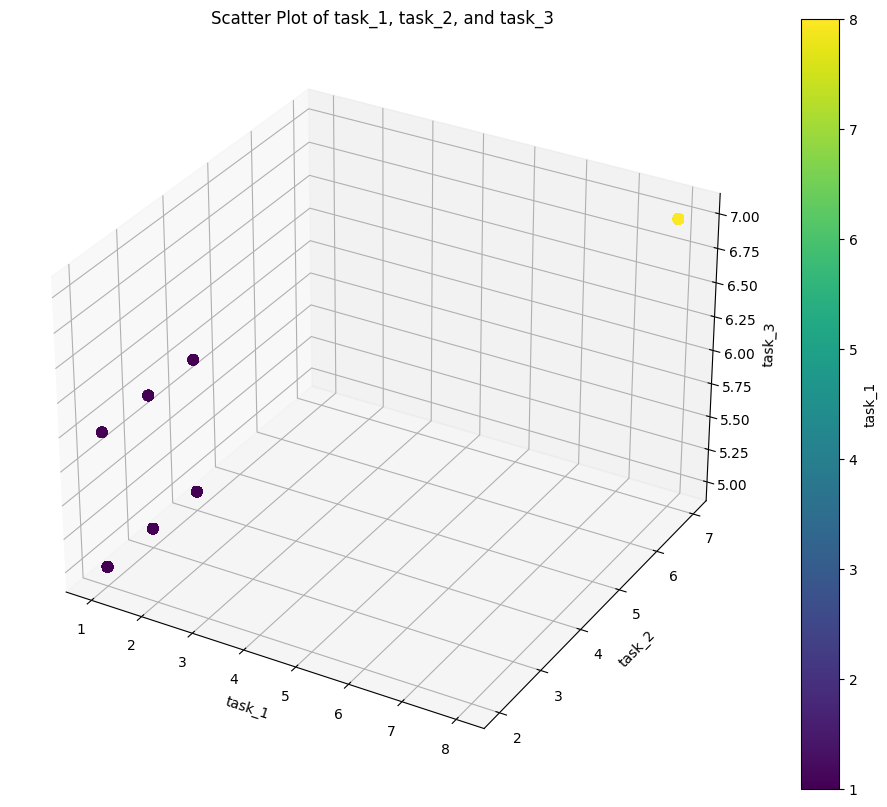

In [ ]:
# 'majority_class_1', 'majority_class_2', and 'majority_class_3' are the columns to compare
column1 = 'task_1'
column2 = 'task_2'
column3 = 'task_3'

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data[column1], data[column2], data[column3], c=data[column1], cmap='viridis', marker='o', s=50)

ax.set_xlabel(column1)
ax.set_ylabel(column2)
ax.set_zlabel(column3)
ax.set_title(f'Scatter Plot of {column1}, {column2}, and {column3}')

# Add a color bar
cbar = fig.colorbar(scatter)
cbar.set_label(column1)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(clean_tweet, labels, test_size=0.2, random_state=42)

TF-IDF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Normalize input data
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse matrices
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)


KNN Classifier:
Accuracy: 62.85%
F1 Score: 55.75
Precision: 57.48
Recall: 62.85


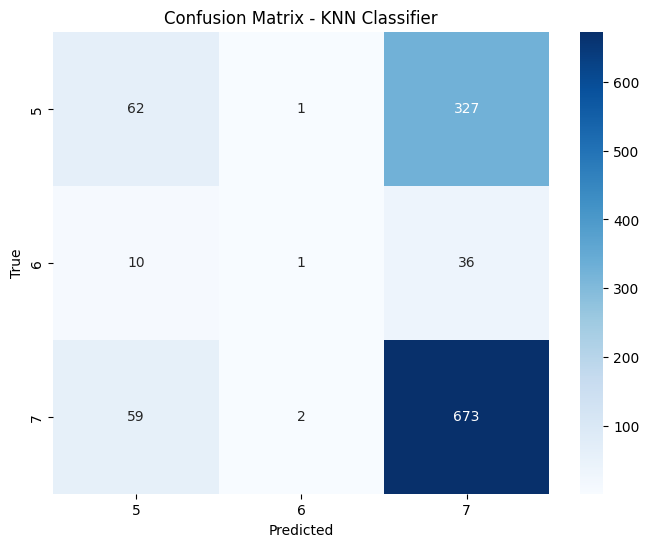


GBC Classifier:
Accuracy: 66.52%
F1 Score: 61.00
Precision: 64.71
Recall: 66.52


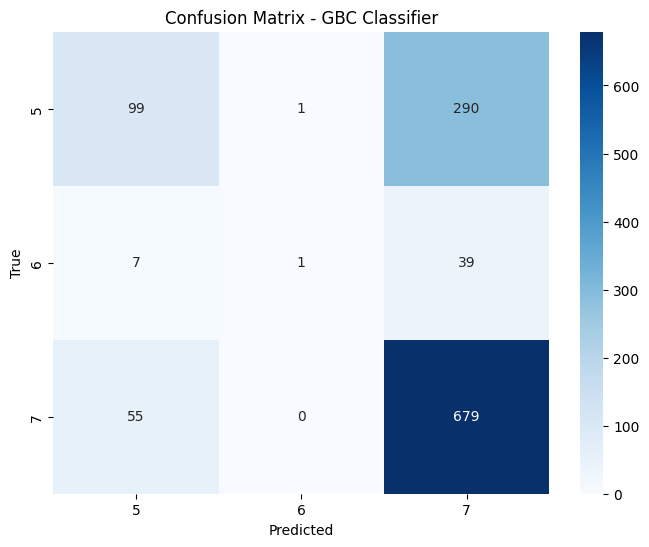


Naive Bayes Classifier:
Accuracy: 52.95%
F1 Score: 54.44
Precision: 57.29
Recall: 52.95


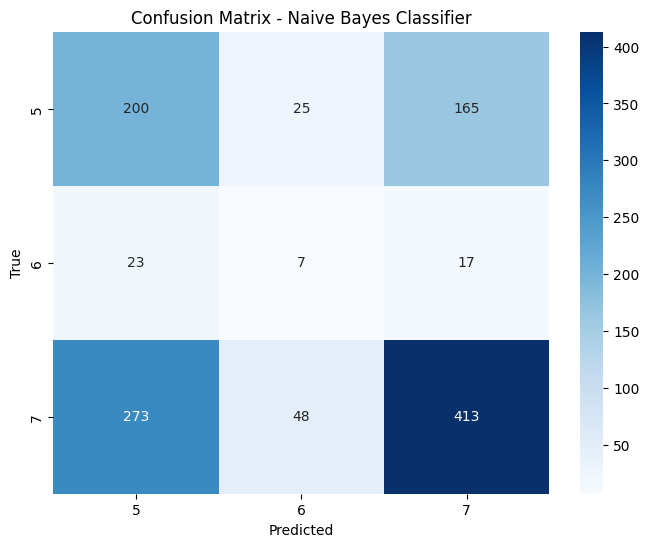


DT Classifier:
Accuracy: 58.16%
F1 Score: 57.55
Precision: 57.03
Recall: 58.16


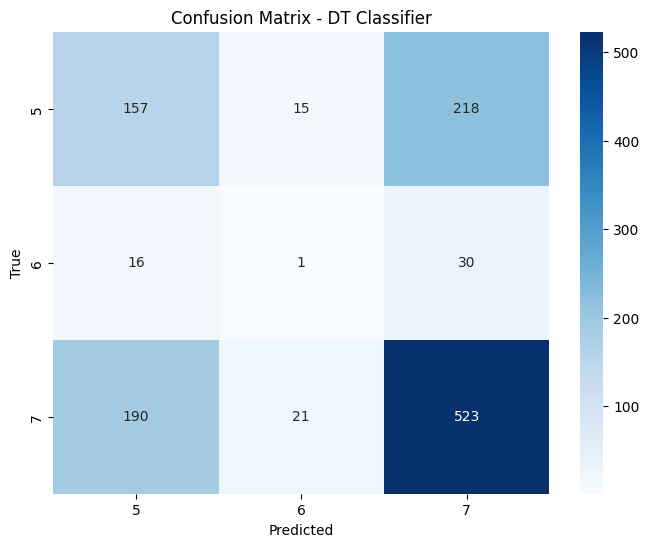

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classifier:
Accuracy: 58.07%
F1 Score: 57.90
Precision: 58.04
Recall: 58.07


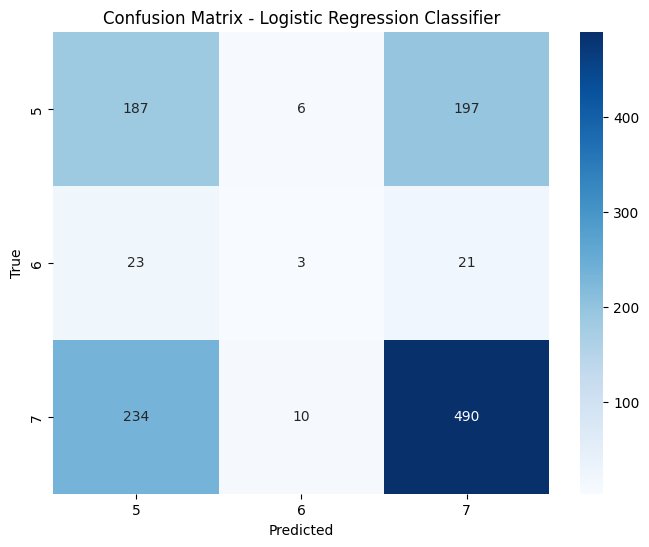


Random Forest Classifier:
Accuracy: 66.52%
F1 Score: 62.43
Precision: 62.33
Recall: 66.52


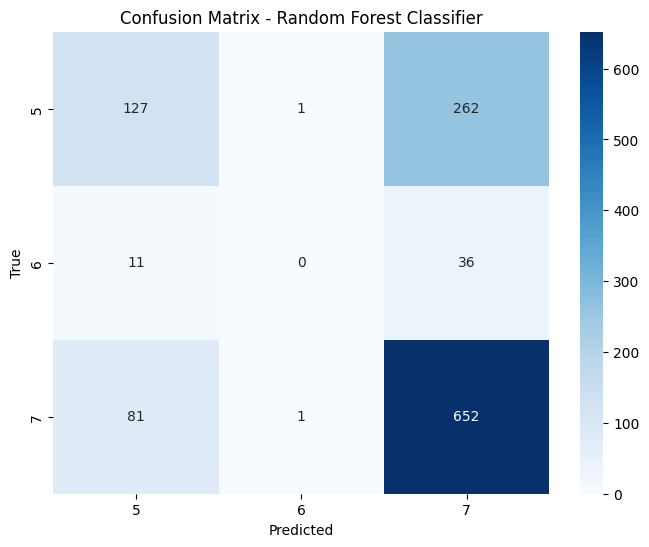


AdaBoost Classifier:
Accuracy: 64.99%
F1 Score: 60.24
Precision: 60.70
Recall: 64.99


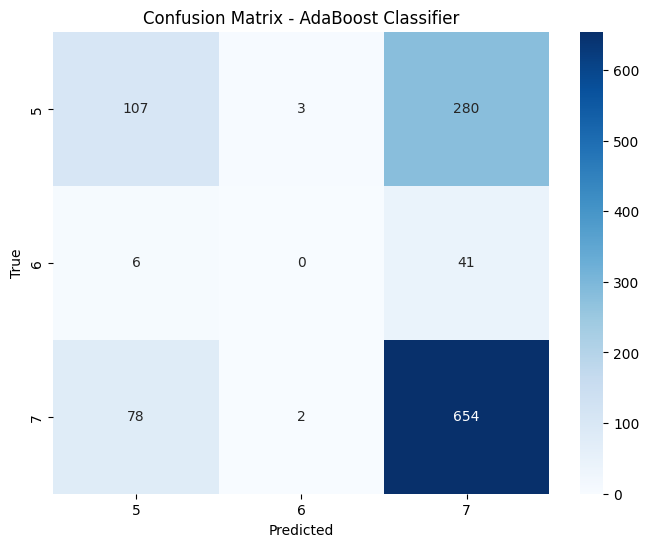

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Support Vector Machine Classifier:
Accuracy: 64.05%
F1 Score: 55.59
Precision: 58.73
Recall: 64.05


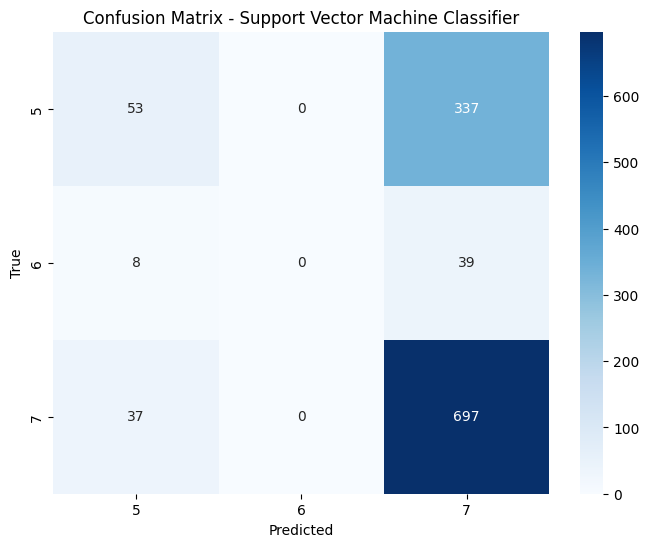


Multi-Layer Perceptron Classifier:
Accuracy: 57.90%
F1 Score: 57.25
Precision: 56.68
Recall: 57.90


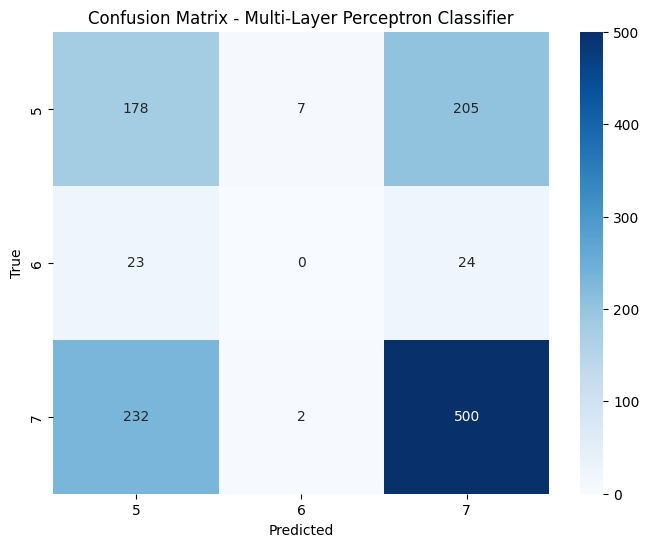

In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "GBC": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
    "DT": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "Multi-Layer Perceptron": MLPClassifier(),
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_tfidf_scaled, y_train)
    y_pred = classifier.predict(X_test_tfidf_scaled)

    # Evaluate the classifier
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}")
    print(f"Precision: {precision*100:.2f}")
    print(f"Recall: {recall*100:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels =np.unique(y_test))
    plt.title(f'Confusion Matrix - {name} Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

LSTM

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
max_length = max(len(seq) for seq in X_train)

for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)


In [ ]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (4681, 106)


In [ ]:
y_test = to_categorical(y_test, num_classes=8)
y_train = to_categorical(y_train, num_classes=8)

In [ ]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 1171
num train tweet: 4681


In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
output_dim = 200

# LSTM model architechture (CNN + LSTM)
lstm_model = Sequential([
    # embedding layer is like idk
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(8, activation="softmax"),
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 106, 200)          3743800   
                                                                 
 lstm_1 (LSTM)               (None, 64)                67840     
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 3820992 (14.58 MB)
Trainable params: 382

In [ ]:
epochs = 10
batch_size = 64
history = lstm_model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
74/74 [==============================] - 40s 481ms/step - loss: 0.3240 - accuracy: 0.4813 - val_loss: 0.1873 - val_accuracy: 0.6268
Epoch 2/10
74/74 [==============================] - 32s 438ms/step - loss: 0.2033 - accuracy: 0.5796 - val_loss: 0.1845 - val_accuracy: 0.6268
Epoch 3/10
74/74 [==============================] - 30s 411ms/step - loss: 0.1971 - accuracy: 0.5894 - val_loss: 0.1835 - val_accuracy: 0.6268
Epoch 4/10
74/74 [==============================] - 31s 422ms/step - loss: 0.1910 - accuracy: 0.6022 - val_loss: 0.1825 - val_accuracy: 0.6268
Epoch 5/10
74/74 [==============================] - 30s 410ms/step - loss: 0.1613 - accuracy: 0.7039 - val_loss: 0.1894 - val_accuracy: 0.6038
Epoch 6/10
74/74 [==============================] - 31s 415ms/step - loss: 0.0936 - accuracy: 0.8761 - val_loss: 0.2475 - val_accuracy: 0.6003
Epoch 7/10
74/74 [==============================] - 29s 397ms/step - loss: 0.0601 - accuracy: 0.9284 - val_loss: 0.2960 - val_accuracy: 0.5739

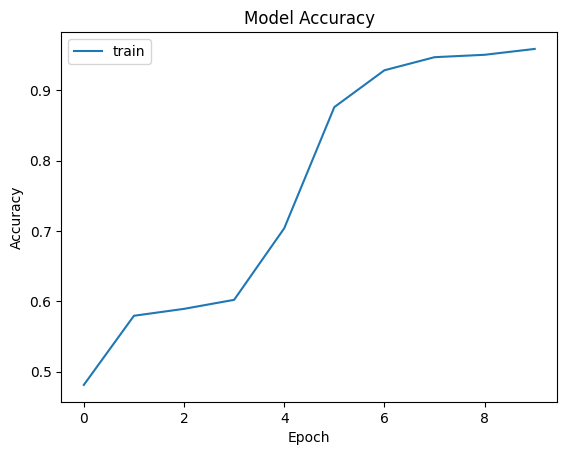

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

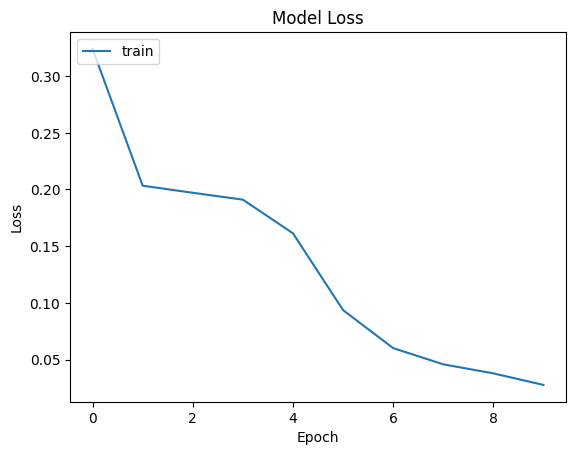

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()


KNN Classifier:
Accuracy: 55.59%
F1 Score: 53.71
Precision: 52.18
Recall: 55.59


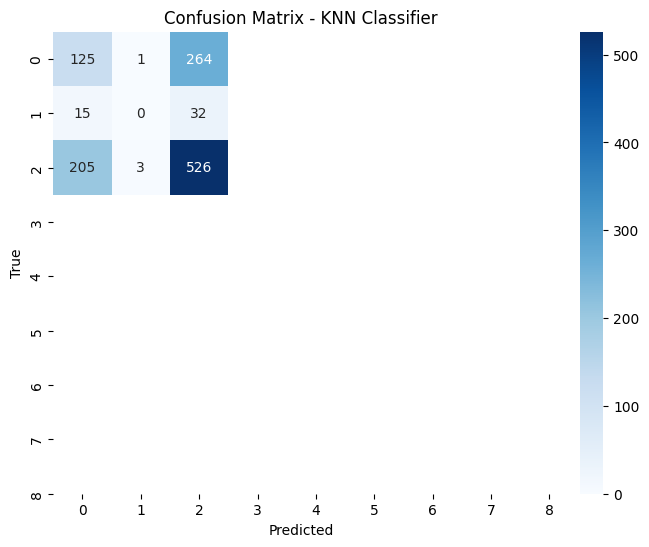

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



GBC Classifier:
Accuracy: 61.32%
F1 Score: 52.30
Precision: 53.04
Recall: 61.32


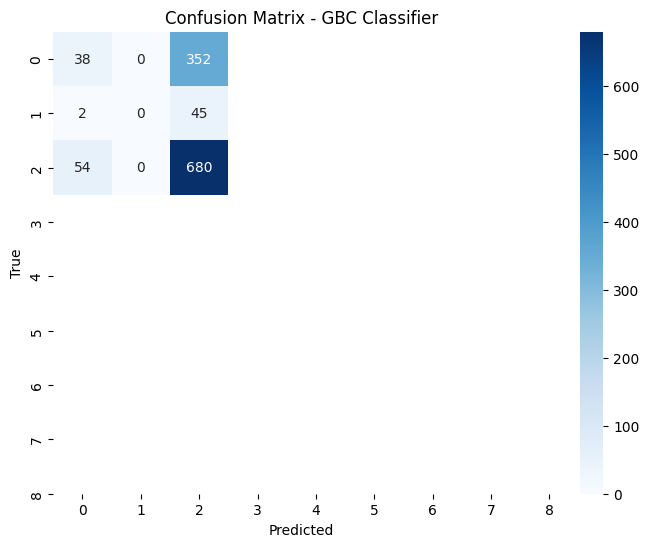


Naive Bayes Classifier:
Accuracy: 32.71%
F1 Score: 39.82
Precision: 54.98
Recall: 32.71


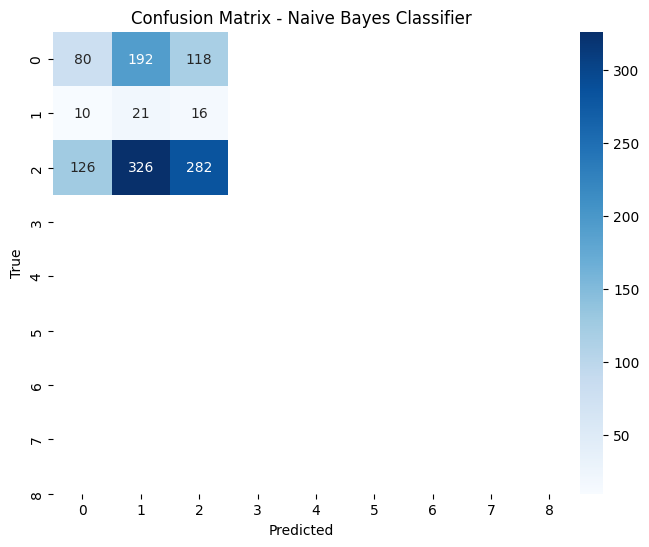


DT Classifier:
Accuracy: 48.33%
F1 Score: 49.24
Precision: 50.49
Recall: 48.33


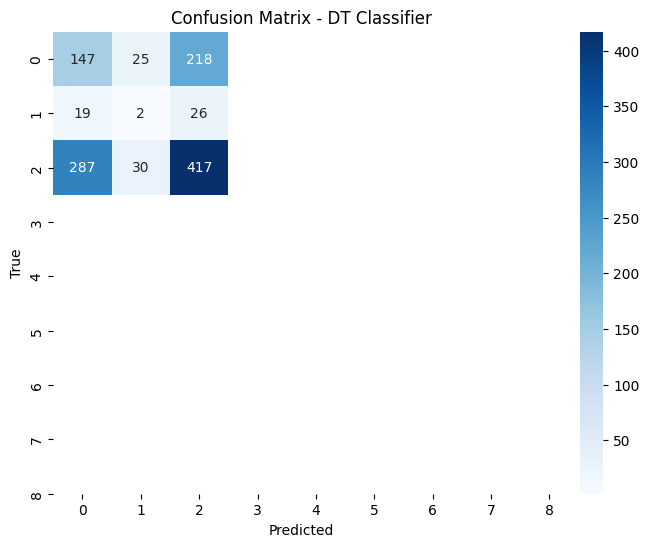

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classifier:
Accuracy: 60.89%
F1 Score: 51.80
Precision: 52.61
Recall: 60.89


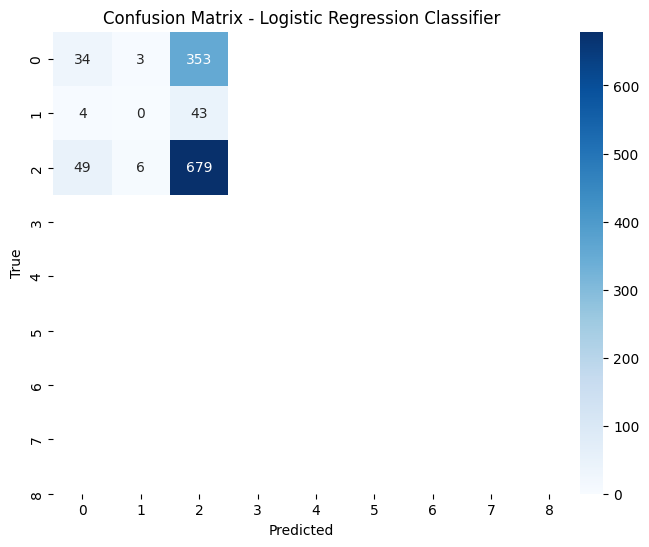

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Classifier:
Accuracy: 60.80%
F1 Score: 51.58
Precision: 51.69
Recall: 60.80


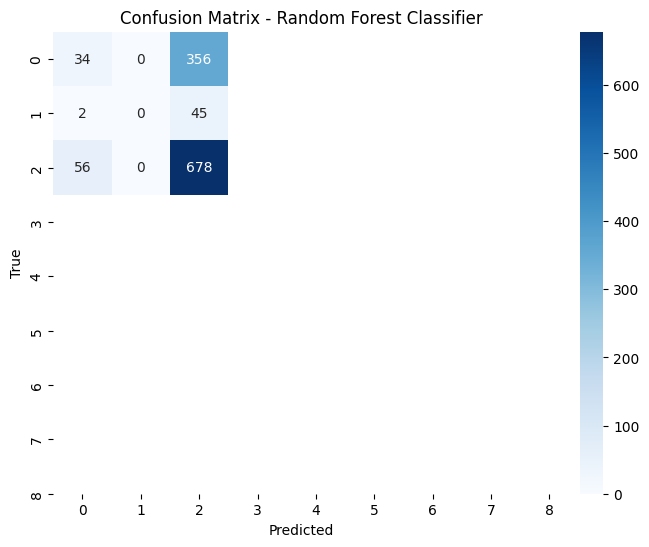


AdaBoost Classifier:
Accuracy: 62.43%
F1 Score: 49.08
Precision: 54.68
Recall: 62.43


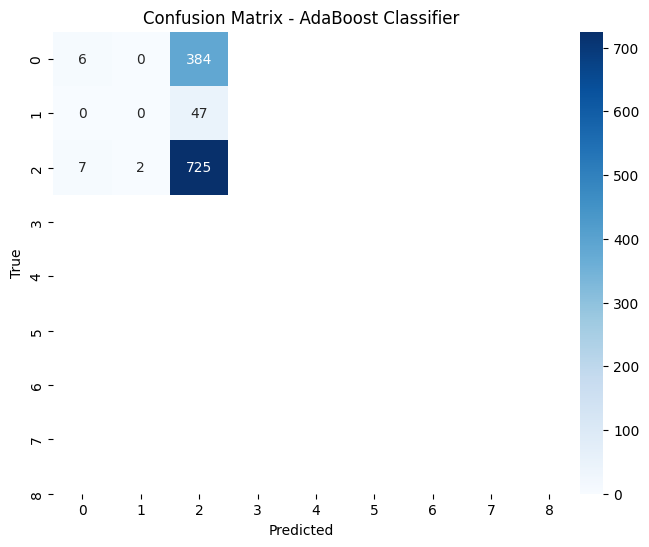

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Support Vector Machine Classifier:
Accuracy: 62.85%
F1 Score: 48.69
Precision: 72.66
Recall: 62.85


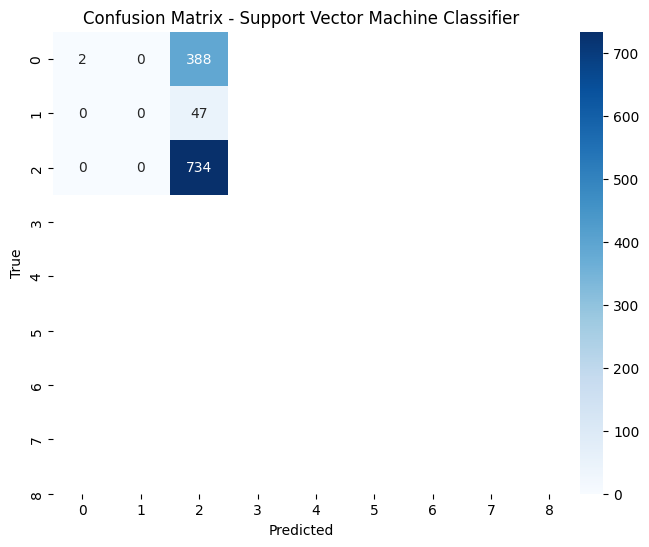


Multi-Layer Perceptron Classifier:
Accuracy: 46.88%
F1 Score: 47.98
Precision: 49.64
Recall: 46.88


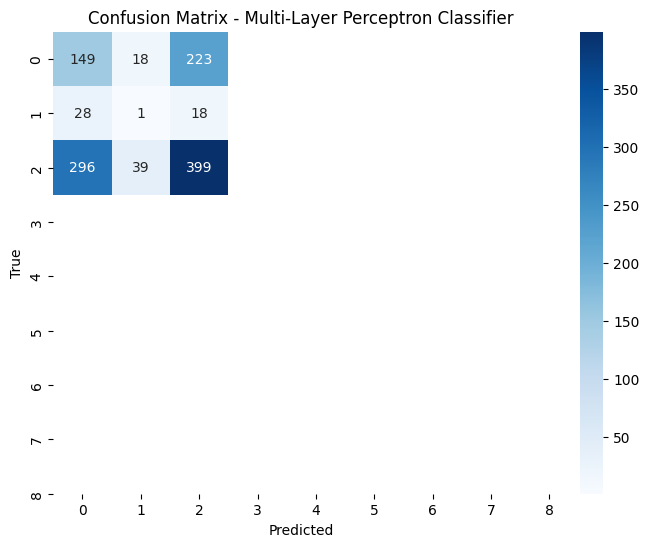

In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "GBC": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
    "DT": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "Multi-Layer Perceptron": MLPClassifier(),
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train.argmax(axis=1))  # Convert one-hot encoded labels back to integers
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    acc = accuracy_score(y_test.argmax(axis=1), y_pred)
    precision = precision_score(y_test.argmax(axis=1), y_pred, average='weighted')
    recall = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
    f1 = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}")
    print(f"Precision: {precision*100:.2f}")
    print(f"Recall: {recall*100:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
    plt.title(f'Confusion Matrix - {name} Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

BERT

In [ ]:
!pip install simpletransformers

In [ ]:
!pip install --upgrade tensorflow==2.14.0
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
from simpletransformers.classification import ClassificationModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def making_label1(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
df['label1'] = df['tweet'].apply(making_label1)

print(df.shape)

(5852, 3)


In [ ]:
X = df['tweet'].astype(str)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Tokenize and encode the training and testing data
def regular_encode(texts, tokenizer, maxlen=128):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_token_type_ids=False,
        return_attention_mask=False,
        pad_to_max_length=True,
        max_length=maxlen,
        truncation=True
    )
    return np.array(enc_di['input_ids'])

In [ ]:
X_train_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=128)
X_test_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=128)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Convert labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train, dtype='int32')
y_test_encoded = tf.keras.utils.to_categorical(y_test, dtype='int32')

In [ ]:
# BERT-based model for text classification
def get_bert_features(input_ids):
   return bert_model(input_ids)[1]

input_ids = tf.keras.layers.Input(shape=(128,), name='input_ids', dtype='int32')
bert_output = bert_model(input_ids)[1]  # Take the pooled output
output = tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')(bert_output)

model = tf.keras.Model(inputs=input_ids, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
batch_size = 32
desired_batches = 112

# Calculate the steps_per_epoch
steps_per_epoch = min(desired_batches, len(X_train) // batch_size)

# Train the model with the specified steps_per_epoch and increased batch size
model.fit(X_train_encoded, y_train_encoded, epochs=10, batch_size=batch_size, validation_split=0.2, steps_per_epoch=steps_per_epoch)

Epoch 1/10
112/112 [==============================] - 132s 862ms/step - loss: 0.8366 - accuracy: 0.6035 - val_loss: 0.8102 - val_accuracy: 0.6265
Epoch 2/10
112/112 [==============================] - 96s 856ms/step - loss: 0.7564 - accuracy: 0.6353 - val_loss: 0.7654 - val_accuracy: 0.6222
Epoch 3/10
112/112 [==============================] - 97s 869ms/step - loss: 0.7291 - accuracy: 0.6417 - val_loss: 0.7465 - val_accuracy: 0.6606
Epoch 4/10
112/112 [==============================] - 98s 878ms/step - loss: 0.6688 - accuracy: 0.7076 - val_loss: 0.7696 - val_accuracy: 0.6649
Epoch 5/10
112/112 [==============================] - 99s 882ms/step - loss: 0.5721 - accuracy: 0.7600 - val_loss: 0.7879 - val_accuracy: 0.6371
Epoch 6/10
112/112 [==============================] - 99s 881ms/step - loss: 0.4618 - accuracy: 0.8156 - val_loss: 0.8744 - val_accuracy: 0.6393
Epoch 7/10
112/112 [==============================] - 99s 883ms/step - loss: 0.3548 - accuracy: 0.8605 - val_loss: 1.0364 - val_a

In [ ]:
# X_train_bert_features_reshaped, X_test_bert_features_reshaped, y_train, and y_test are defined
X_train_bert_features = bert_model.predict(X_train_encoded)[1]
X_train_bert_features_reshaped = X_train_bert_features.reshape(X_train_bert_features.shape[0], -1)
X_test_bert_features = bert_model.predict(X_test_encoded)[1]
X_test_bert_features_reshaped = X_test_bert_features.reshape(X_test_bert_features.shape[0], -1)

if len(y_train.shape) > 1:
    y_train_encoded = np.argmax(y_train, axis=1)
else:
    y_train_encoded = y_train

if len(y_test.shape) > 1:
    y_test_encoded = np.argmax(y_test, axis=1)
else:
    y_test_encoded = y_test



37/37 [==============================] - 10s 269ms/step



KNN Classifier:
Accuracy: 66.27%


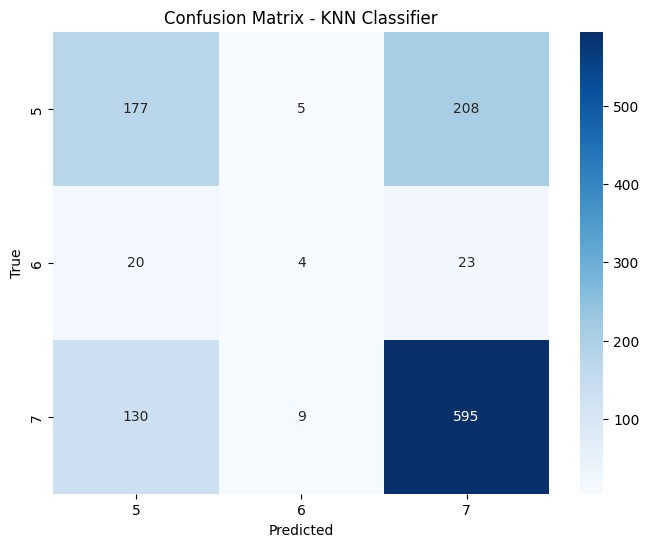


GBC Classifier:
Accuracy: 65.67%


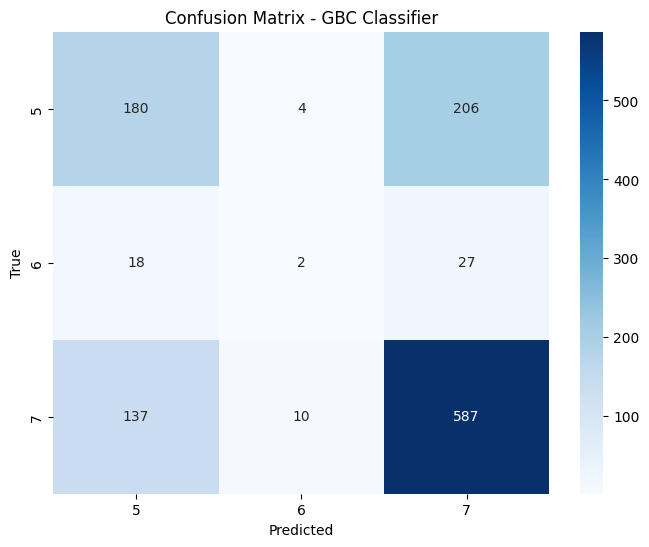


NaiveBayes Classifier:
Accuracy: 59.69%


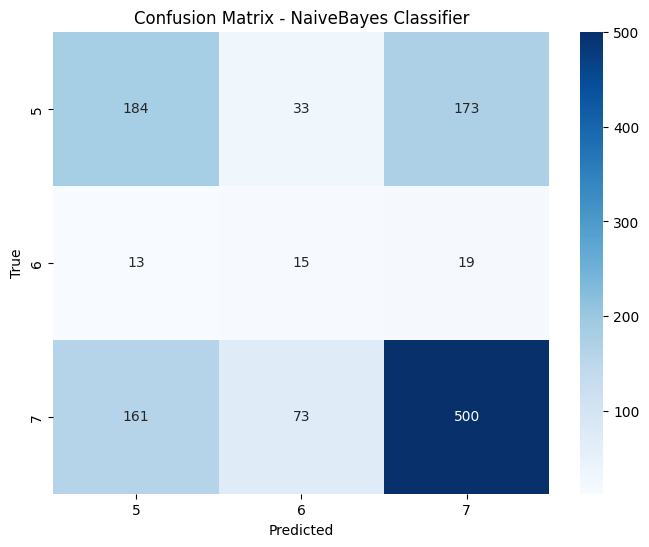

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression Classifier:
Accuracy: 65.07%


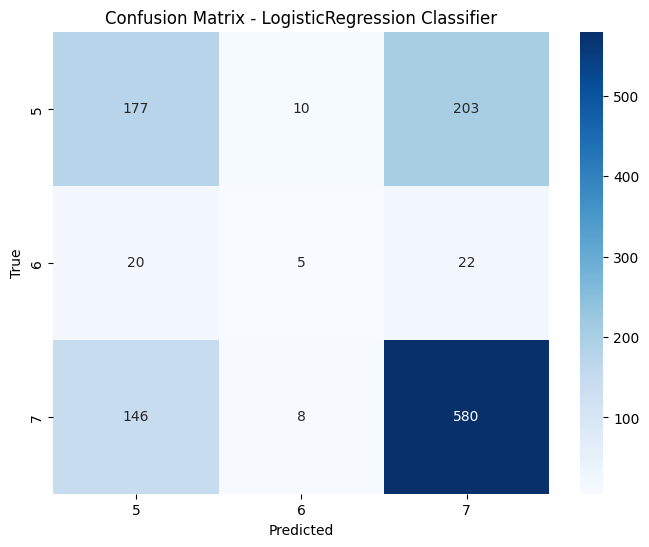


RandomForest Classifier:
Accuracy: 66.44%


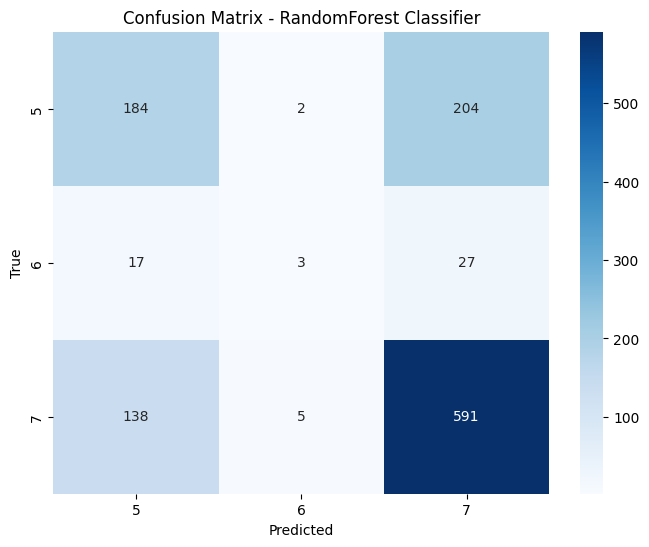


DecisionTree Classifier:
Accuracy: 61.14%


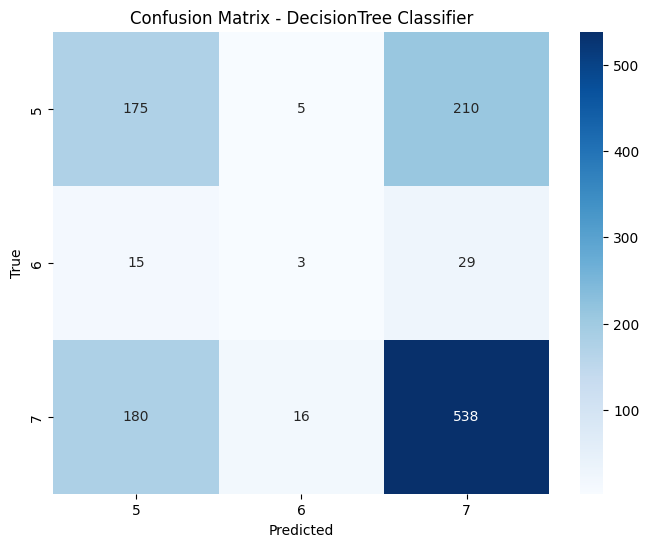


AdaBoost Classifier:
Accuracy: 65.84%


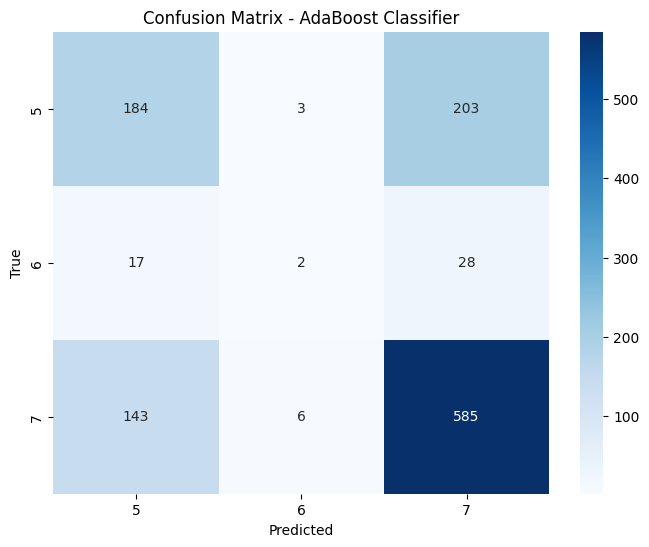


SVM Classifier:
Accuracy: 66.78%


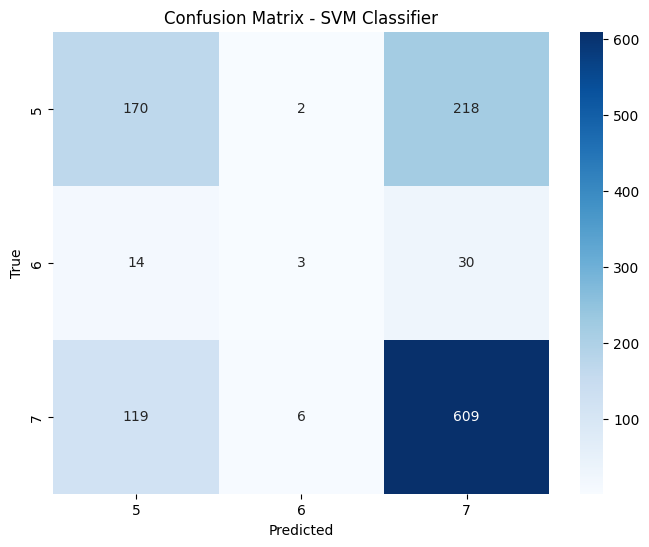


MLP Classifier:
Accuracy: 64.47%


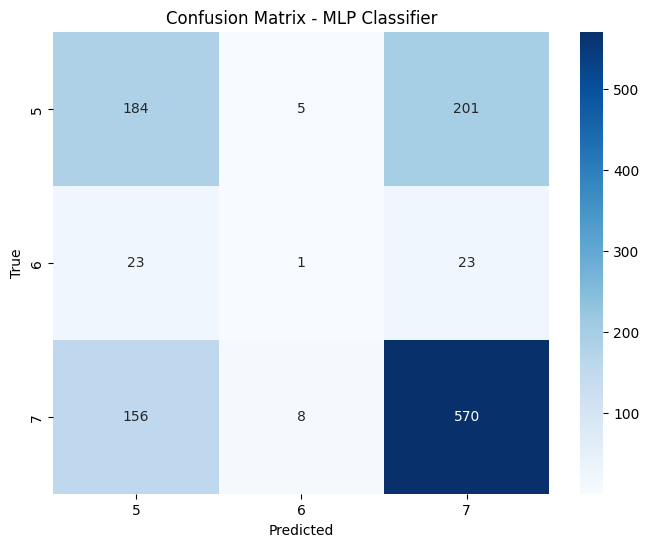

In [ ]:
# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "GBC": GradientBoostingClassifier(),
    "NaiveBayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier()
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train_bert_features_reshaped, y_train_encoded)
    y_pred = classifier.predict(X_test_bert_features_reshaped)
 # Evaluate the classifier
    acc = accuracy_score(y_test_encoded, y_pred)
    #print(f'{name} Classification Report:\n{classification_rep}')
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {acc*100:.2f}%")

    # Plot confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_encoded), yticklabels=np.unique(y_test_encoded))
    plt.title(f'Confusion Matrix - {name} Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()